In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
# 平均次数を求める関数
def average_deg(G):
    return 2*len(G.edges()) / len(G.nodes())

# グラフの概要を表示する関数
def info(G):
    print(f'Number of nodes: {len(G.nodes())}')
    print(f'Number of edges: {len(G.edges())}')
    print(f'Average degree: {average_deg(G)}')
    print(f'Average path length: {nx.average_shortest_path_length(G)}')
    print(f'Average clustering: {nx.average_clustering(G)}')
    
# 次数分布を描画する関数
def plot_dd(G, bins):
    fs = 20 # font size
    
    degree = dict(nx.degree(G))    
    plt.hist(degree.values(), bins=bins, color='teal', ec='black')
    plt.xlabel('Degree', fontsize=fs)
    plt.ylabel('# nodes', fontsize=fs)

## NetworkXの組み込み関数から生成
スモールワールド・ネットワークは組み込み関数`networkx.watts_strogatz_graph()`で簡単に作ることができる

Number of nodes: 20
Number of edges: 40
Average degree: 4.0
Average path length: 2.3947368421052633
Average clustering: 0.3733333333333333


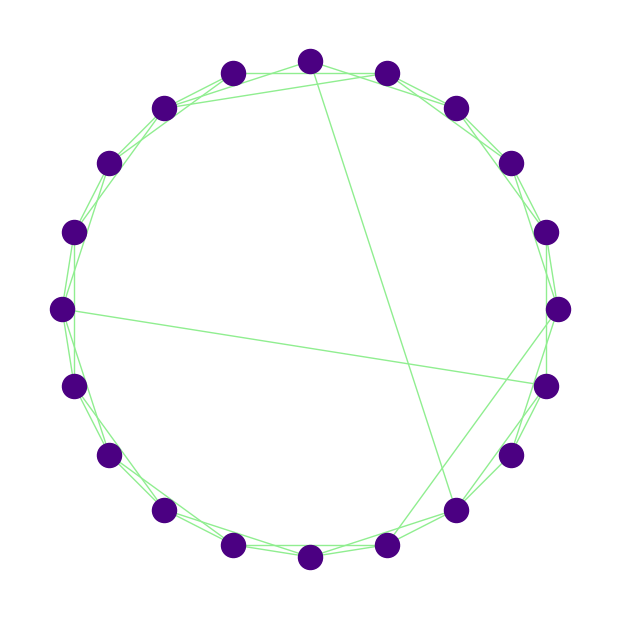

In [3]:
n = 20 # ノード数
k = 4 # 次数
p = 0.1 # リンクつなぎ替え確率

G1 = nx.watts_strogatz_graph(n, k, p)
info(G1)
plt.figure(figsize=(6,6))
nx.draw_circular(G1, node_color='indigo', edge_color='lightgreen')
plt.show()

## スモールワールド・ネットワークを自分で作る
`np.random.rand()`で一様分布から0.0以上、1.0未満の乱数を生成

In [4]:
# スモールワールド・ネットワーク生成関数
def gen_WS_network(n, k, p, seed=None):
    if seed != None:
        np.random.seed(seed=seed)
        # np.random.seed(0)のように乱数のseed値を固定すると常に同じ乱数を発生させることができる
    
    # 空のグラフを生成して、n個のノードを追加
    G = nx.Graph()
    G.add_nodes_from(list(range(n)))
    
    # 規則格子を作る
    for i in range(n):
        for j in range(k//2):
            G.add_edge(i, (i+j+1)%n) # k/2本リンクを張る
    
    for u, v in G.edges():
        if np.random.rand() < p:
            G.remove_edge(u, v)
            
            # 新しいリンク先をランダムに選ぶ
            new_edge = (u + np.random.randint(0, n)) % n
            
            # self-loopを避ける
            while u == new_edge:
                new_edge = (u + np.random.randint(0, n)) % n
            
            # 既存のリンクとの重複を避ける
            while G.has_edge(u, new_edge) == True:
                new_edge = (u + np.random.randint(n)) % n
            
            G.add_edge(u, new_edge)
    
    return G
            

Number of nodes: 20
Number of edges: 40
Average degree: 4.0
Average path length: 2.5157894736842104
Average clustering: 0.3916666666666666


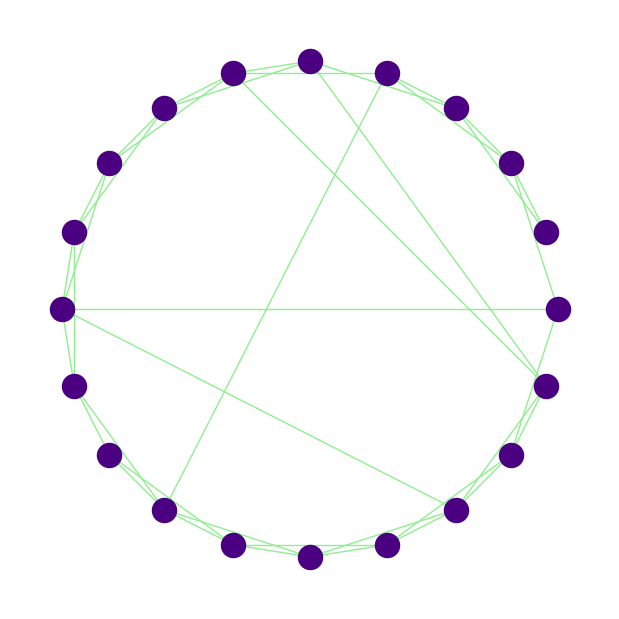

In [5]:
n = 20 # ノード数
k = 4 # 次数
p = 0.1 # リンクつなぎ換え確率

G2 = gen_WS_network(n, k, p)
info(G2)
plt.figure(figsize=(6,6))
nx.draw_circular(G1, node_color='indigo', edge_color='lightgreen')
plt.show()

## 論文のグラフ再現
> All the graphs have n = 1,000 vertices and an average degree of k = 10 edges per vertex. We note that a logarithmic horizontal scale has been used to resolve the rapid drop in L(p), corresponding to the onset of the small-world phenomenon.

[Collective dynamics of ‘small-world’ networks | Nature](https://www.nature.com/articles/30918.) 

In [6]:
n = 1000
k = 10

# 正規化のためのグラフ作成
# 自作関数
myG_nor = gen_WS_network(n, k, 0)
myC_nor = nx.average_clustering(myG_nor)
myD_nor = nx.average_shortest_path_length(myG_nor)

# 規格化のためのグラフ作成
# 組み込み関数
nxG_nor = nx.watts_strogatz_graph(n, k, 0)
nxC_nor = nx.average_clustering(nxG_nor)
nxD_nor = nx.average_shortest_path_length(nxG_nor)

# 確率pを作成していく
tmp = np.array(range(1, 11)) #array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# 確率pの配列を格納する箱を準備
parray = np.zeros(40)

# 確率を格納
parray[0:10]  = tmp/10000
parray[10:20] = tmp/1000
parray[20:30] = tmp/100
parray[30:40] = tmp/10

In [7]:
myC = []
myD = []
nxC = []
nxD = []

# データポイントの作成
for p in parray:
    myG = gen_WS_network(n, k, p)
    myC.append(nx.average_clustering(myG))
    myD.append(nx.average_shortest_path_length(myG))
    
    nxG = nx.watts_strogatz_graph(n, k, p)
    nxC.append(nx.average_clustering(nxG))
    nxD.append(nx.average_shortest_path_length(nxG))

# p=0のときの値で正規化
myC = np.array(myC) / myC_nor
myD = np.array(myD) / myD_nor
nxC = np.array(nxC) / nxC_nor
nxD = np.array(nxD) / nxD_nor

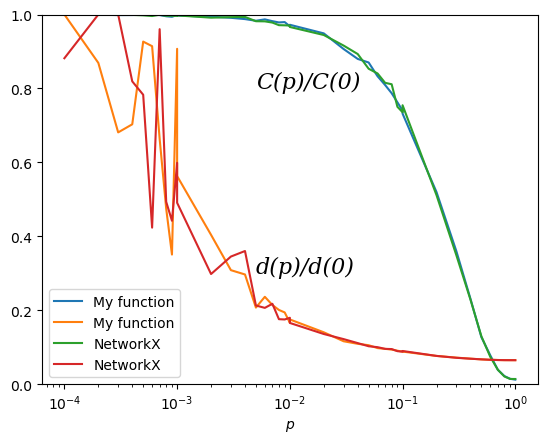

In [8]:
# グラフを描画
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(parray, myC, label='My function')
ax.plot(parray, myD, label='My function')
ax.plot(parray, nxC, label='NetworkX')
ax.plot(parray, nxD, label='NetworkX')

ax.set_xlabel(r'$p$')
ax.text(5*10**(-3), 0.8, "C(p)/C(0)",
                         fontfamily="serif",
                         fontstyle="italic",
                         fontsize=16)
ax.text(5*10**(-3), 0.3, "d(p)/d(0)",
                         fontfamily="serif",
                         fontstyle="italic",
                         fontsize=16)
ax.set_ylim(0,1)
ax.set_xscale('log')
plt.legend()
plt.show()

## グラフのインタラクティブな可視化
pyvisライブラリを使うと，ネットワークをインタラクティブに可視化できる．  
`.from_nx()`メソッドでnetworkxのグラフオブジェクトを描画

In [8]:
from pyvis.network import Network

In [ ]:
net = Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white')
net.from_nx(G1)
net.show("watts_strogaz.html")

次数によってノードのサイズを変えることも可能．  
ハブが現れるスケールフリーネットワークで確認してみる．

In [ ]:
# スケールフリーネットワークを生成
SFN = nx.barabasi_albert_graph(n=150, m=1)

net = Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white')
# ノードサイズを次数によって変える
node_degree = dict(SFN.degree)
nx.set_node_attributes(SFN, node_degree, 'size')
net.from_nx(SFN)
net.show("barabasi_albert.html")

## 情報の拡散シミュレーション（SIモデル）
### シミュレーション条件
- 初期状態で，1つだけが情報を知るノード，それ以外は知らないノードとする．
- 1ステップごとに情報を知るノードから情報を知らないノードへある確率（ここでは$p=0.5$）で情報が拡がる．
- 情報を知っているノードは情報を忘れることはない

### つなぎ替え確率が拡散に与える影響を確認する
つなぎ換え確率を，$p=0.00$（規則格子）, $p=0.01$, $p=0.10$, $p=1.00$（ランダム・ネットワーク）としたときの情報の拡散の様子をプロットしていく．

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML
import copy
import random

つなぎ換え確率が$p=0.00$のとき（規則格子）

In [ ]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.00, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
r'''
ncに各ノードの状態を記録. 0が情報を知っているノードで, 1が知らないノード.
初期状態としてノード98だけが情報を知っているものとする.
'''
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#噂を知らないノードを白色, 知っているノードを黒色で表示させる
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla() # 現在描写されているグラフを消去
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G)) # propagation ratioを計算
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 200, frames = 50, repeat=False)
HTML(ani.to_jshtml())

In [6]:
plot_data_000= copy.copy(plot_data)

つなぎ換え確率が$p=0.02$のとき

In [ ]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.02, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 200, frames = 50, repeat=False)
HTML(ani.to_jshtml())


In [10]:
plot_data_002= copy.copy(plot_data)

つなぎ換え確率が$p=0.10$のとき

In [ ]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.1, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 200, frames = 50, repeat=False)
HTML(ani.to_jshtml())


In [12]:
plot_data_010= copy.copy(plot_data)

つなぎ換え確率が$p=1.00$のとき（ランダム・ネットワーク）

In [ ]:
G = nx.watts_strogatz_graph(n = 100, k = 4, p = 1, seed=0) 
pos = nx.circular_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 200, frames = 50, repeat=False)
HTML(ani.to_jshtml())


In [14]:
plot_data_100= copy.copy(plot_data)

### 拡散スピードの可視化

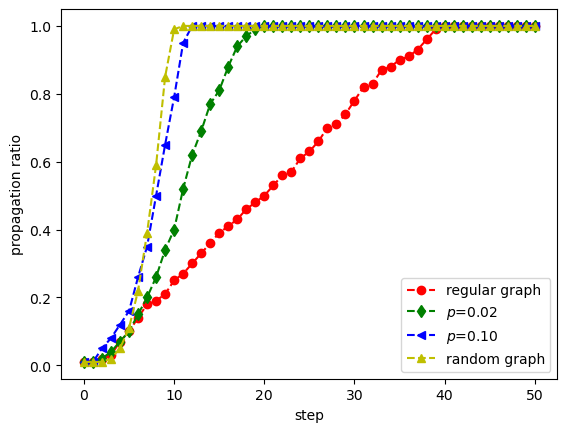

In [19]:
plt.xlabel('step')
plt.ylabel('propagation ratio')

plt.plot(plot_data_000, marker="o", color="r", linestyle="--", label='regular graph')
plt.plot(plot_data_002, marker="d", color = "g", linestyle = "--", label=r'$p$=0.02')
plt.plot(plot_data_010, marker="<", color = "b", linestyle = "--", label=r'$p$=0.10')
plt.plot(plot_data_100, marker="^", color = "y", linestyle = "--", label='random graph')
plt.legend()
plt.show()